In [24]:
pip install faker


In [25]:
import pandas as pd
import numpy as np
import random
from faker import Faker
from datetime import datetime, timedelta


random.seed(42)
np.random.seed(42)


employee_origins = {
    "India": 313944,
    "China": 49917,
    "Mexico": 2444,
    "Canada": 4006,
    "Philippines": 2736,
    "Taiwan": 2676,
    "South Korea": 3928
}


international_total = sum(employee_origins.values())


origin_countries = ["USA"]
origin_probabilities = [0.60]


for nation, employee_count in employee_origins.items():
    origin_countries.append(nation)
    probability = 0.40 * (employee_count / international_total)
    origin_probabilities.append(probability)


gender_options = ["female", "male", "nonbinary"]
gender_distribution = [0.49, 0.49, 0.02]


org_units = {
    "Engineering": 0.30,
    "Product Management": 0.10,
    "Sales": 0.20,
    "Marketing": 0.10,
    "Customer Support": 0.10,
    "IT": 0.06,
    "Human Resources": 0.05,
    "Finance": 0.02,
    "Legal": 0.02,
    "Administrative": 0.04,
    "Executive Leadership": 0.01
}

# Map countries to localization settings
country_localization = {
    "USA": "en_US",
    "India": "en_IN",
    "China": "zh_CN",
    "Mexico": "es_MX",
    "Canada": "en_CA",
    "Philippines": "en_PH",
    "Taiwan": "zh_TW",
    "South Korea": "ko_KR"
}

fake_generators = {locale: Faker(locale) for locale in set(country_localization.values())}
us_faker = Faker("en_US")


department_positions = {
    "Engineering": [
        ("Software Engineer", (100000, 150000)),
        ("Senior Software Engineer", (170000, 220000))
    ],
    "Product Management": [
        ("Product Manager", (100000, 150000)),
        ("Senior Product Manager", (125000, 180000))
    ],
    "Sales": [
        ("Sales Executive", (100000, 180000)),
        ("Sales Manager", (160000, 280000))
    ],
    "Marketing": [
        ("Marketing Manager", (80000, 104000)),
        ("VP of Marketing", (200000, 300000))
    ],
    "Customer Support": [
        ("Support Specialist", (50000, 90000)),
        ("Customer Support Manager", (75000, 120000))
    ],
    "IT": [
        ("IT Analyst", (70000, 100000)),
        ("IT Manager", (95000, 135000))
    ],
    "Human Resources": [
        ("HR Manager", (90000, 130000)),
        ("Recruiter", (70000, 110000))
    ],
    "Finance": [
        ("Financial Analyst", (70000, 100000)),
        ("Controller", (120000, 170000))
    ],
    "Legal": [
        ("Legal Counsel", (150000, 250000)),
        ("Legal IT Support", (46500, 94000))
    ],
    "Administrative": [
        ("Admin Assistant", (35000, 60000)),
        ("IT Services Admin", (50000, 75000))
    ],
    "Executive Leadership": [
        ("VP", (200000, 400000)),
        ("CFO", (250000, 500000))
    ]
}

def generate_random_date(start_date, end_date):
    """Generate a random date between two dates"""
    time_between = end_date - start_date
    random_days = random.randint(0, time_between.days)
    return start_date + timedelta(days=random_days)

def create_birth_date():
    """Generate a realistic birth date for working adults"""
    current_date = datetime.today()
    max_age_date = current_date - timedelta(days=65*365)
    min_age_date = current_date - timedelta(days=20*365)
    return generate_random_date(max_age_date, min_age_date).date()

def create_hire_date(birth_date):
    """Generate hire date ensuring employee was at least 20 when hired"""
    earliest_possible = max(datetime(2010, 1, 1),
        datetime.combine(birth_date, datetime.min.time()) + timedelta(days=365*20))
    return generate_random_date(earliest_possible, datetime.today()).date()

# Generate employee records
employee_records = []
for record_num in range(10000):
    employee_id = 100000000 + record_num
    birth_country = random.choices(origin_countries, weights=origin_probabilities)[0]
    locale_setting = country_localization[birth_country]
    data_generator = fake_generators[locale_setting]

    full_name = us_faker.name()
    contact_number = us_faker.phone_number()
    email_address = us_faker.email()
    employee_gender = random.choices(gender_options, weights=gender_distribution)[0]
    dob = create_birth_date()
    employment_date = create_hire_date(dob)

    org_unit = random.choices(list(org_units.keys()), weights=list(org_units.values()))[0]
    position, (min_salary, max_salary) = random.choice(department_positions[org_unit])
    annual_salary = random.randint(min_salary, max_salary)
    social_security = us_faker.ssn()

    employee_records.append({
        "EmployeeID": employee_id,
        "NationalOrigin": birth_country,
        "FullName": full_name,
        "ContactNumber": contact_number,
        "Email": email_address,
        "Gender": employee_gender,
        "DateOfBirth": dob,
        "EmploymentDate": employment_date,
        "Department": org_unit,
        "JobTitle": position,
        "AnnualSalary": annual_salary,
        "SSN": social_security
    })


emp_df = pd.DataFrame(employee_records)
emp_df.to_csv("emp_df.csv", index=False)

In [26]:
emp_df.describe(include='all')

,EmployeeID,NationalOrigin,FullName,ContactNumber,Email,Gender,DateOfBirth,EmploymentDate,Department,JobTitle,AnnualSalary,SSN
count,1.000000e+04,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000.000000,10000
unique,NaN,8,9382,10000,9773,3,7523,4539,11,22,NaN,10000
top,NaN,USA,Christopher Smith,750-882-2695x1477,qbrown@example.org,male,2004-04-14,2025-05-30,Engineering,Software Engineer,NaN,735-32-9492
freq,NaN,5918,7,1,4,4928,5,11,2977,1499,NaN,1
mean,1.000050e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145039.044000,NaN
std,2.886896e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58831.737788,NaN
min,1.000000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35050.000000,NaN
25%,1.000025e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101430.000000,NaN
50%,1.000050e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133853.500000,NaN
75%,1.000075e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185234.000000,NaN


In [27]:
emp_df.head(10)


,EmployeeID,NationalOrigin,FullName,ContactNumber,Email,Gender,DateOfBirth,EmploymentDate,Department,JobTitle,AnnualSalary,SSN
0,100000000,India,Matthew Kemp,216-509-5256x1814,john49@example.net,female,1985-02-28,2015-06-30,Engineering,Software Engineer,144348,416-79-9573
1,100000001,India,Brian Brock,+1-333-940-3322,judy81@example.org,male,1998-05-04,2018-09-06,Engineering,Software Engineer,115247,737-85-2046
2,100000002,USA,Nicholas Gibson,+1-433-663-2656x253,carol20@example.com,female,1978-04-29,2024-07-29,Customer Support,Customer Support Manager,89446,382-57-7007
3,100000003,USA,Michael Dixon,001-740-412-5470x9070,kevin59@example.org,female,1961-01-25,2013-07-31,Marketing,VP of Marketing,236421,429-36-2928
4,100000004,USA,Tonya Randolph,+1-935-354-1993,bradley54@example.org,male,1990-09-07,2012-12-17,Engineering,Software Engineer,123526,470-19-5602
5,100000005,India,Jessica White,(562)823-0947x69334,robertskim@example.org,male,1964-05-20,2020-04-21,Sales,Sales Manager,170328,560-90-0747
6,100000006,USA,Angela Hernandez,+1-571-935-9470x1051,logan30@example.com,male,1992-12-06,2017-03-25,Customer Support,Support Specialist,64935,107-02-8893
7,100000007,India,James Barton,001-720-624-1823x99503,jacobmendez@example.com,nonbinary,1981-05-16,2012-04-07,Product Management,Senior Product Manager,166660,327-68-9671
8,100000008,India,Stacy Gomez,(759)335-3363x6046,lopezbreanna@example.net,female,1992-05-11,2017-01-16,Marketing,Marketing Manager,99960,229-01-1824
9,100000009,India,Guy Reyes,741-254-5627,hartkyle@example.net,male,1982-06-13,2013-08-31,Sales,Sales Manager,243886,457-27-8484


In [28]:
total_payroll = emp_df['AnnualSalary'].sum()
print(f"Total yearly payroll: ${total_payroll:,.2f}")

Total yearly payroll: $1,450,390,440.00


<ipython-input-29-524454981>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette="viridis")


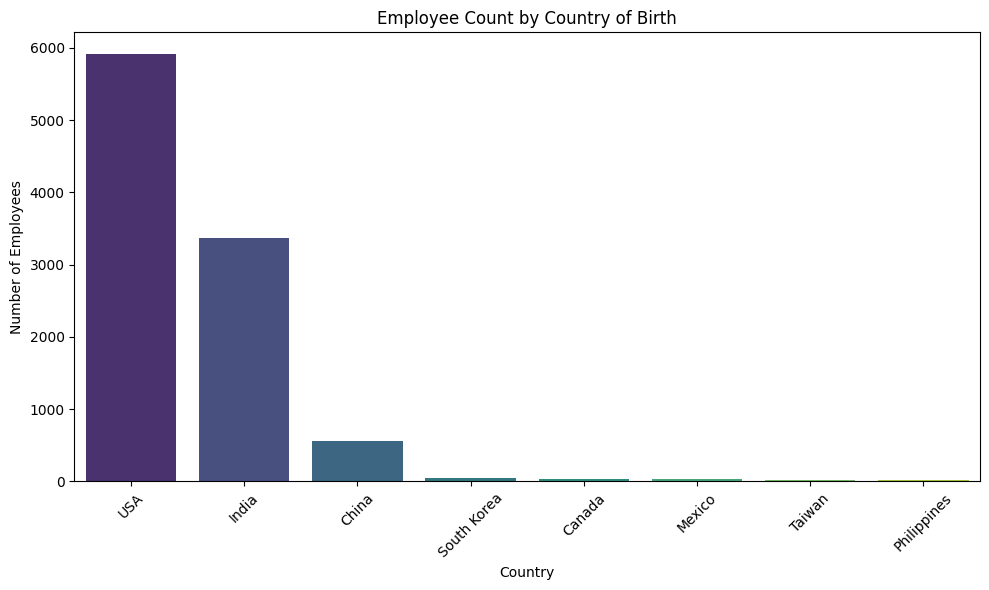

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
plt.figure(figsize=(10, 6))
country_counts = emp_df['NationalOrigin'].value_counts().sort_values(ascending=False)
sns.barplot(x=country_counts.index, y=country_counts.values, palette="viridis")
plt.title("Employee Count by Country of Birth")
plt.xlabel("Country")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-30-2432879073>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_counts.index, y=dept_counts.values, palette="magma")


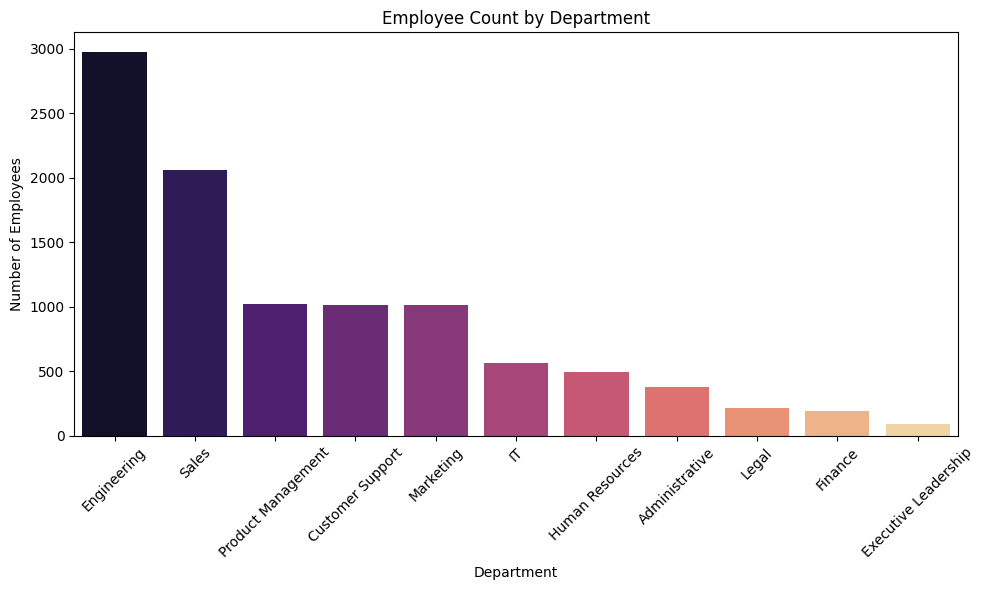

In [30]:
plt.figure(figsize=(10, 6))
dept_counts = emp_df['Department'].value_counts().sort_values(ascending=False)
sns.barplot(x=dept_counts.index, y=dept_counts.values, palette="magma")
plt.title("Employee Count by Department")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-31-3362005232>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=emp_df, x='HireDay', order=day_order, palette="rocket")


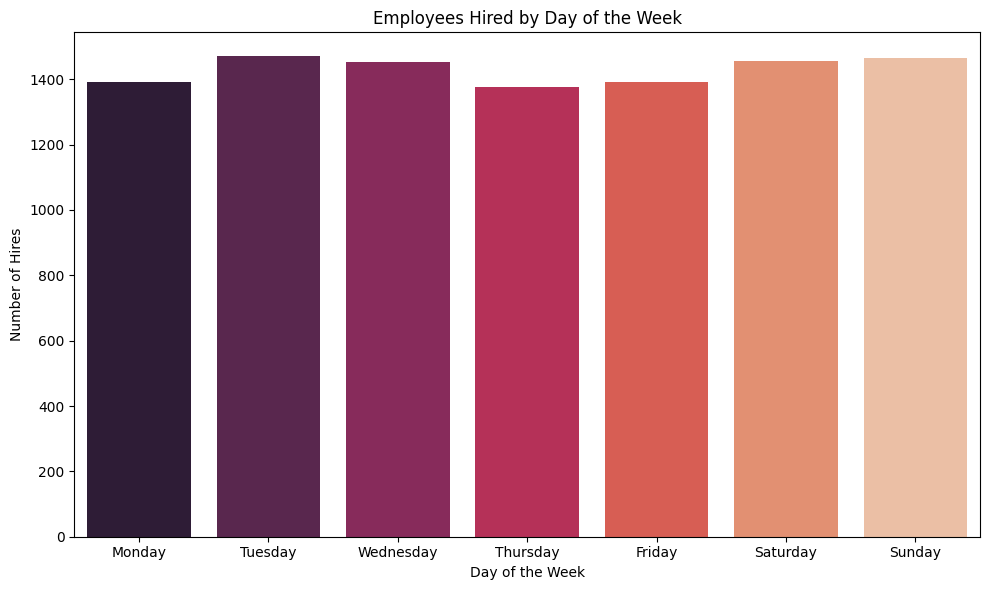

In [31]:
emp_df['HireDay'] = pd.to_datetime(emp_df['EmploymentDate']).dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
sns.countplot(data=emp_df, x='HireDay', order=day_order, palette="rocket")
plt.title("Employees Hired by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Hires")
plt.tight_layout()
plt.show()

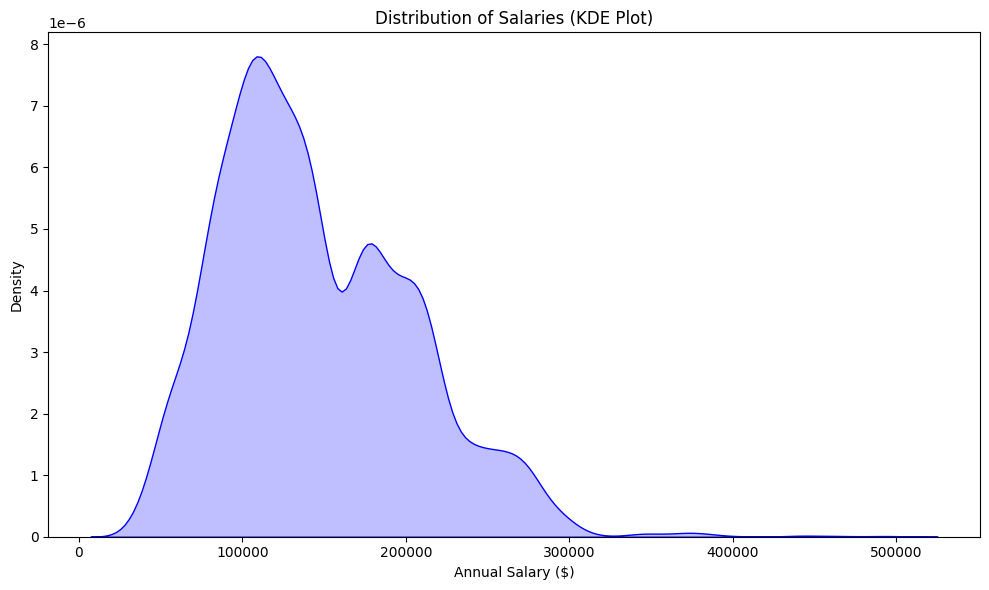

In [32]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=emp_df, x='AnnualSalary', fill=True, color="blue")
plt.title("Distribution of Salaries (KDE Plot)")
plt.xlabel("Annual Salary ($)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

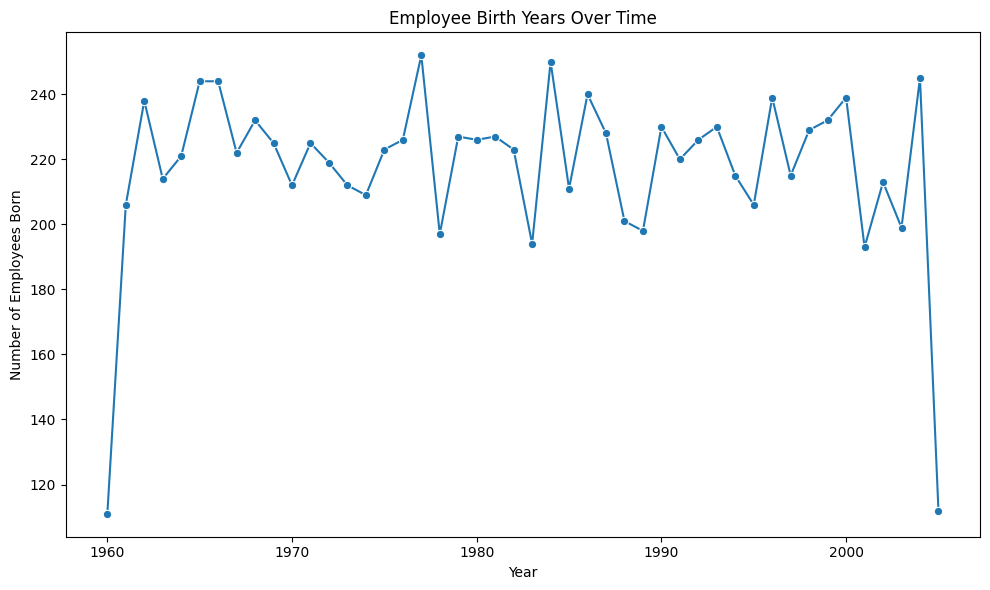

In [33]:
emp_df['BirthYear'] = pd.to_datetime(emp_df['DateOfBirth']).dt.year
birth_year_counts = emp_df['BirthYear'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=birth_year_counts.index, y=birth_year_counts.values, marker="o")
plt.title("Employee Birth Years Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Employees Born")
plt.tight_layout()
plt.show()

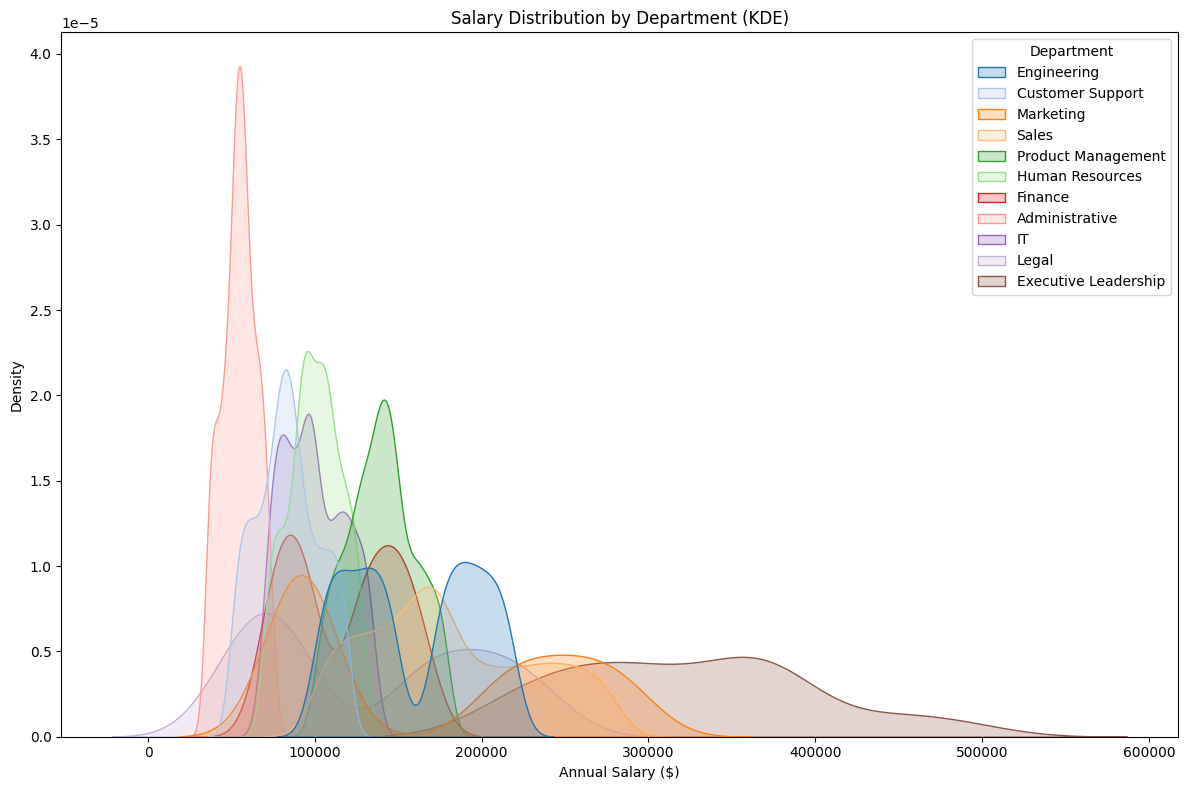

In [34]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=emp_df, x='AnnualSalary', hue='Department', fill=True, common_norm=False, palette="tab20")
plt.title("Salary Distribution by Department (KDE)")
plt.xlabel("Annual Salary ($)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

In [35]:
emp_df['DateOfBirth'] = pd.to_datetime(emp_df['DateOfBirth'])
current_year = datetime.now().year
emp_df['Age'] = current_year - emp_df['DateOfBirth'].dt.year

emp_df['Weight'] = 1
emp_df.loc[emp_df['Age'].between(40, 49), 'Weight'] = 3

# Normalize weights to sum to 1 (required for sample())
emp_df['Weight'] = emp_df['Weight'] / emp_df['Weight'].sum()

smpl_df = emp_df.sample(n=500, weights='Weight', random_state=42)

summary = smpl_df.describe(include='all')
print(summary)

          EmployeeID NationalOrigin           FullName      ContactNumber  \
count   5.000000e+02            500                500                500   
unique           NaN              8                496                500   
top              NaN            USA  Melissa Hernandez  (544)346-1120x244   
freq             NaN            298                  2                  1   
mean    1.000050e+08            NaN                NaN                NaN   
min     1.000000e+08            NaN                NaN                NaN   
25%     1.000024e+08            NaN                NaN                NaN   
50%     1.000052e+08            NaN                NaN                NaN   
75%     1.000076e+08            NaN                NaN                NaN   
max     1.000099e+08            NaN                NaN                NaN   
std     2.970769e+03            NaN                NaN                NaN   

                       Email Gender                 DateOfBirth  \
count   

In [36]:
print(smpl_df.head(10))

      EmployeeID NationalOrigin                FullName  \
3786   100003786            USA          Jennifer Mckay   
9491   100009491            USA         Henry Rodriguez   
7355   100007355            USA           Dustin Monroe   
6000   100006000          India  Mrs. Patty Vazquez DDS   
1576   100001576            USA        Katherine Butler   
594    100000594            USA            Amanda Russo   
8638   100008638          India             Kyle French   
6027   100006027            USA         Jonathan Flores   
7104   100007104            USA             Joseph Moss   
215    100000215          China            Andrea Black   

              ContactNumber                        Email  Gender DateOfBirth  \
3786          (390)597-8217       andreahall@example.net  female  1972-10-08   
9491      (720)849-5518x502           rbaker@example.net  female  1991-10-23   
7355           527-740-0048        craigkirk@example.org  female  1976-01-08   
6000  +1-988-374-9103x79577   

In [37]:
import pandas as pd
import numpy as np

salary_range = emp_df['AnnualSalary'].max() - emp_df['AnnualSalary'].min()
sigma = salary_range * 0.05

np.random.seed(42)
noise = np.random.normal(loc=0, scale=sigma, size=len(emp_df))
emp_df['PerturbedSalary'] = emp_df['AnnualSalary'] + noise

# Ensure no negative salaries
emp_df['PerturbedSalary'] = emp_df['PerturbedSalary'].clip(lower=30000)

# Create perturbed DataFrame
prtrb_df = emp_df.copy()

summary = prtrb_df.describe(include='all')
print(summary)

          EmployeeID NationalOrigin           FullName      ContactNumber  \
count   1.000000e+04          10000              10000              10000   
unique           NaN              8               9382              10000   
top              NaN            USA  Christopher Smith  750-882-2695x1477   
freq             NaN           5918                  7                  1   
mean    1.000050e+08            NaN                NaN                NaN   
min     1.000000e+08            NaN                NaN                NaN   
25%     1.000025e+08            NaN                NaN                NaN   
50%     1.000050e+08            NaN                NaN                NaN   
75%     1.000075e+08            NaN                NaN                NaN   
max     1.000100e+08            NaN                NaN                NaN   
std     2.886896e+03            NaN                NaN                NaN   

                     Email Gender                 DateOfBirth EmploymentDat

In [38]:
prtrb_df.head(10)


,EmployeeID,NationalOrigin,FullName,ContactNumber,Email,Gender,DateOfBirth,EmploymentDate,Department,JobTitle,AnnualSalary,SSN,HireDay,BirthYear,Age,Weight,PerturbedSalary
0,100000000,India,Matthew Kemp,216-509-5256x1814,john49@example.net,female,1985-02-28,2015-06-30,Engineering,Software Engineer,144348,416-79-9573,Tuesday,1985,40,0.000207,155827.113748
1,100000001,India,Brian Brock,+1-333-940-3322,judy81@example.org,male,1998-05-04,2018-09-06,Engineering,Software Engineer,115247,737-85-2046,Thursday,1998,27,0.000069,112051.698174
2,100000002,USA,Nicholas Gibson,+1-433-663-2656x253,carol20@example.com,female,1978-04-29,2024-07-29,Customer Support,Customer Support Manager,89446,382-57-7007,Monday,1978,47,0.000207,104414.146884
3,100000003,USA,Michael Dixon,001-740-412-5470x9070,kevin59@example.org,female,1961-01-25,2013-07-31,Marketing,VP of Marketing,236421,429-36-2928,Wednesday,1961,64,0.000069,271618.372285
4,100000004,USA,Tonya Randolph,+1-935-354-1993,bradley54@example.org,male,1990-09-07,2012-12-17,Engineering,Software Engineer,123526,470-19-5602,Monday,1990,35,0.000069,118114.692095
5,100000005,India,Jessica White,(562)823-0947x69334,robertskim@example.org,male,1964-05-20,2020-04-21,Sales,Sales Manager,170328,560-90-0747,Tuesday,1964,61,0.000069,164917.071511
6,100000006,USA,Angela Hernandez,+1-571-935-9470x1051,logan30@example.com,male,1992-12-06,2017-03-25,Customer Support,Support Specialist,64935,107-02-8893,Saturday,1992,33,0.000069,101430.766088
7,100000007,India,James Barton,001-720-624-1823x99503,jacobmendez@example.com,nonbinary,1981-05-16,2012-04-07,Product Management,Senior Product Manager,166660,327-68-9671,Saturday,1981,44,0.000207,184395.493334
8,100000008,India,Stacy Gomez,(759)335-3363x6046,lopezbreanna@example.net,female,1992-05-11,2017-01-16,Marketing,Marketing Manager,99960,229-01-1824,Monday,1992,33,0.000069,89110.399994
9,100000009,India,Guy Reyes,741-254-5627,hartkyle@example.net,male,1982-06-13,2013-08-31,Sales,Sales Manager,243886,457-27-8484,Saturday,1982,43,0.000207,256424.616863


In [ ]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(emp_df, title="Employee Data Profile", explorative=True)
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 17/17 [00:03<00:00,  5.35it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]